In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal.csv')

In [3]:
ordinal = ordinal.drop(['PID', 'Unnamed: 0.1'], axis=1)
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [4]:
ordinal.shape

(2580, 81)

In [5]:
cols = ordinal.columns
cols

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
     

In [6]:
len(cols)

81

In [7]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [8]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

In [9]:
y

array([126000, 139500, 124900, ..., 145000, 217500, 215000])

In [10]:
X.shape

(2580, 80)

In [11]:
Ridge = Ridge()

In [12]:
Ridge_R2 = []
GBM_R2 = []
GBM_AR2 = []
GBM_MAE = []

for i in range(100):

    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    ##Combine X_train and Y_train to create a "Train DataFrame"
    train = pd.DataFrame(np.hstack((X_train, Y_train.reshape(-1,1))),
                         index=X_train[:,0], columns=cols).drop(['Unnamed: 0'], axis=1)
    
    ##Run Ridge Regression on Training Data (X=X_train, Y=Log10)
    base = pd.read_csv('../../../Data/BaseData.csv')
    base = base.drop(['PID', 'Unnamed: 0.1'], axis=1)

    X_ridge = base.drop(['SalePrice'], axis=1)
    y_ridge = base.SalePrice.values
    
    #base_drop_outs = base.drop(drop_index, axis=0)
    #X_ridge = base_drop_outs.drop(['Log10'], axis=1)
    #y_ridge = base_drop_outs.Log10.values
    
    scaler_ridge_X = preprocessing.StandardScaler().fit(X_ridge)
    scaled_ridge_X = scaler_ridge_X.transform(X_ridge)
    
    #scaler_ridge_Y = preprocessing.StandardScaler().fit(y_ridge.reshape(-1,1))
    #scaled_ridge_Y = scaler_ridge_X.transform(y_ridge)
    
    Ridge.fit(scaled_ridge_X, y_ridge)
    Ridge_Score = Ridge.score(scaled_ridge_X, y_ridge)
    Ridge_Results = Ridge.predict(scaled_ridge_X)
    Ridge_R2.append(Ridge_Score)
    
    #print(Score)
    #USD = 10**Ridge_Results
    
    #print(USD)
    #print(len(USD))
    
    base_ordinal = pd.read_csv('../../../Data/BaseOrdinal.csv')
    base_ordinal = base_ordinal.assign(Log10 = np.log10(base_ordinal.SalePrice.values))
    base_ordinal = base_ordinal.drop(['PID', 'Unnamed: 0.1'], axis=1)
    
    base_ordinal = base_ordinal.assign(Ridge = Ridge_Results)
    
    keep_index = train.index
    X_train = base_ordinal[base_ordinal.index.isin(keep_index)].drop(['SalePrice', 'Log10'], axis=1)
    X_test = base_ordinal[~base_ordinal.index.isin(keep_index)].drop(['SalePrice', 'Log10'], axis=1)
    Y_train = base_ordinal[base_ordinal.index.isin(keep_index)].SalePrice.values
    Y_test = base_ordinal[~base_ordinal.index.isin(keep_index)].SalePrice.values
    
    #X_ordinal = base_ordinal.drop(['SalePrice'], axis=1).values
    #Y_ordinal = base_ordinal.SalePrice.values
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    GBM_R2.append(GBM_Score)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
    GBM_AR2.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    GBM_MAE.append(mae)

In [13]:
Results = pd.DataFrame({'Ridge R2': Ridge_R2, 'R+GBM_R2_NLYS': GBM_R2, 'R+GBM_AR2_NLYS': GBM_AR2,
                        'R+GBM MAE NLYS':GBM_MAE})
#Results

In [14]:
Results.describe()

,Ridge R2,R+GBM_R2_NLYS,R+GBM_AR2_NLYS,R+GBM MAE NLYS
count,1.000000e+02,100.000000,100.000000,100.000000
mean,9.395630e-01,0.935590,0.926323,11893.099794
std,1.004235e-15,0.015867,0.018150,511.217268
min,9.395630e-01,0.893455,0.878126,10618.029469
25%,9.395630e-01,0.928650,0.918385,11569.946347
50%,9.395630e-01,0.940724,0.932195,11907.067472
75%,9.395630e-01,0.946632,0.938954,12263.247314
max,9.395630e-01,0.958247,0.952240,13125.166344


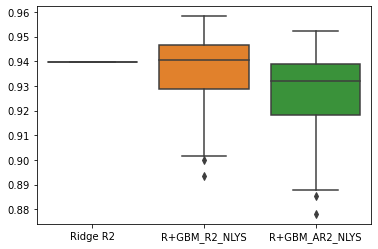

In [16]:
sns.boxplot(data=Results[['Ridge R2','R+GBM_R2_NLYS', 'R+GBM_AR2_NLYS']]);

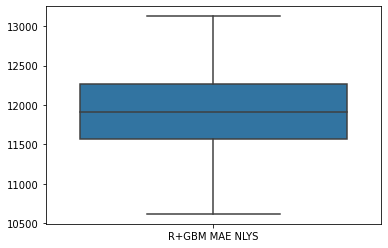

In [17]:
sns.boxplot(data=Results[['R+GBM MAE NLYS']]);

In [18]:
Results.to_csv('Results4.csv', index=False)

In [ ]:
#base_ordinal

In [ ]:
#X_train.shape[1]

In [ ]:
#train

In [ ]:
len(Ridge_Results)